Note: many sources were used for putting this Notebook together, often code and comments are included as-is from the original source. Sources are provided ahead of the content that was taken from them. Thank you to the creators of the many wonderful Geopandas resources already in existance!

# First we need to import our libraries

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame

# new imports 
import os
data_pth = "../Data/"

# Now to use some of our own data!

In [2]:
eclipses = gpd.read_file(os.path.join(data_pth, "Eclipses.shp"))

In [3]:
eclipses.head()

,OID_,Name,FolderPath,SymbolID,AltMode,Base,Clamped,Extruded,Snippet,PopupInfo,Shape_Leng,Shape_Area,Year,geometry
0,0,Umbra,TSE 2017.08.21/TSE 2017 August 21 Umbral Path,0,0,0.0,-1,0,None,None,303.633219,130.461081,2017,"POLYGON Z ((-171.57693 39.73810000000003 0, -1..."
1,0,Umbra,TSE 2019.07.02/TSE 2019 July 02 Umbral Path,0,0,0.0,-1,0,None,None,223.557661,165.607105,2019,"POLYGON Z ((-160.39845 -37.64846999999997 0, -..."
2,0,Umbra,TSE 2020.12.14/TSE 2020 December 14 Umbral Path,0,0,0.0,-1,0,None,None,310.979509,99.233931,2020,"POLYGON Z ((-132.81568 -7.773699999999963 0, -..."
3,0,Umbra,TSE 2021.12.04/TSE 2021 December 04 Umbral Path,0,0,0.0,-1,0,None,None,274.491359,757.922577,2021,POLYGON Z ((-51.18286999999998 -53.08708999999...
4,0,Umbra Limit (East),HSE 2023.04.20/HSE 2023 April 20 Umbral Path,0,0,0.0,-1,0,None,None,267.246357,31.230251,2023,POLYGON Z ((180.0000000000001 3.21677000000005...


In [4]:
# Check the coordinate reference system of our data, its crs
eclipses.crs

{'init': 'epsg:4326'}

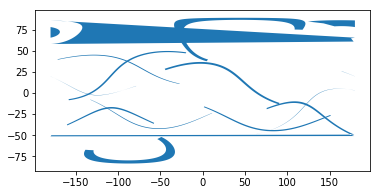

In [5]:
# Now we plot
eclipses.plot()

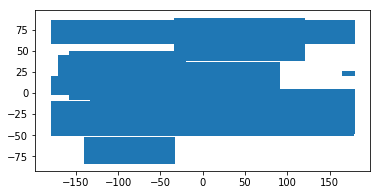

In [6]:
# Examine what the envelop of our data looks like
eclipses.envelope.plot()

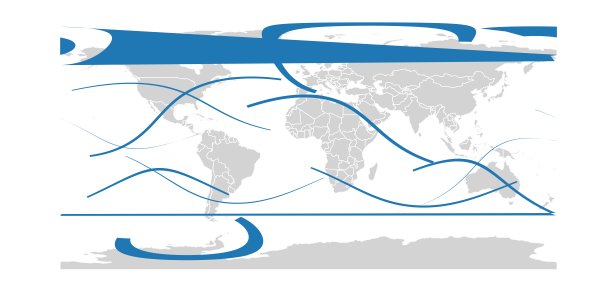

In [7]:
# Where exactly are these paths? Let's add our basemap to make this clear.
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
# Pass ax=ax to the second layer
eclipses.plot(ax=ax)
# There is an axis by default. You can see it if you comment out the below.
ax.set_axis_off()

In [8]:
# Let's load in the cities provided by geopandas. Note these are just the capitals.
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

(-198.0, 198.00000000000014, -98.95351100000003, 98.0237310000001)

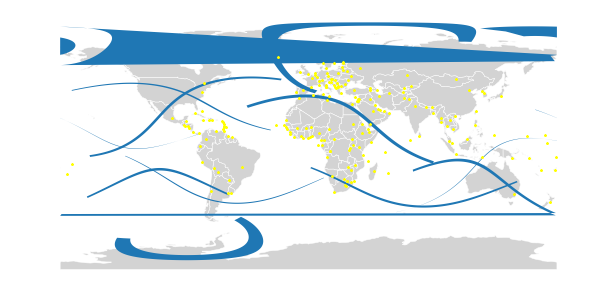

In [9]:
# Now we'll plot our basemap, our eclipse paths, and our cities
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
eclipses.plot(ax=ax)
cities.plot(marker='*', color='yellow', markersize=5, ax=ax)
ax.axis('off')

In [10]:
# But we want MORE cities, so let's use our own. This is a local shapefile in your data directory.
cities = gpd.read_file(os.path.join(data_pth, "ne_10m_populated_places.shp"))

In [11]:
cities.head()

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,DIFFASCII,NAMEASCII,ADM0CAP,...,wof_id,CAPALT,NAME_EN,NAME_DE,NAME_ES,NAME_FR,NAME_PT,NAME_RU,NAME_ZH,geometry
0,10,1,8,Admin-1 capital,Colonia del Sacramento,None,None,0,Colonia del Sacramento,0.0,...,421199749,NaN,Colonia del Sacramento,Colonia del Sacramento,Colonia del Sacramento,Colonia del Sacramento,Colônia do Sacramento,Колония-дель-Сакраменто,科洛尼亞德爾薩克拉門托,POINT (-57.84000247340134 -34.47999900541754)
1,10,1,8,Admin-1 capital,Trinidad,None,None,0,Trinidad,0.0,...,890444639,NaN,Trinidad,Trinidad,Trinidad,Trinidad,Trinidad,Тринидад,特立尼達,POINT (-56.90099656015872 -33.5439989373607)
2,10,1,8,Admin-1 capital,Fray Bentos,None,None,0,Fray Bentos,0.0,...,890451703,NaN,Fray Bentos,Fray Bentos,Fray Bentos,Fray Bentos,Fray Bentos,Фрай-Бентос,弗賴本托斯,POINT (-58.3039974719095 -33.1389990288435)
3,10,1,8,Admin-1 capital,Canelones,None,None,0,Canelones,0.0,...,890444649,NaN,Canelones,Canelones,Canelones,Canelones,Canelones,Канелонес,卡內洛內斯,POINT (-56.28400149324307 -34.53800400667546)
4,10,1,8,Admin-1 capital,Florida,None,None,0,Florida,0.0,...,890431207,NaN,Florida,Florida,Florida,Florida,Florida,Флорида,佛羅里達,POINT (-56.21499844799416 -34.09900200521719)


In [12]:
# Check the crs of our new cities data
cities.crs

{'init': 'epsg:4326'}

In [13]:
# Is the cities data still in the same crs as the eclipse data? Let's check.
eclipses.crs == cities.crs

# See what happens if they are not in the same crs

True

(-198.38630091388413, 198.1796256180855, -99.64179619362255, 98.0565064854107)

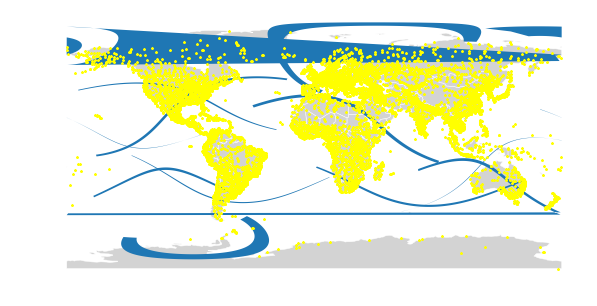

In [14]:
# Great. Let's plot it all again
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
eclipses.plot(ax=ax)
cities.plot(marker='*', color='yellow', markersize=5, ax=ax)
ax.axis('off')

(-198.38630091388413, 198.1796256180855, -99.64179619362255, 98.0565064854107)

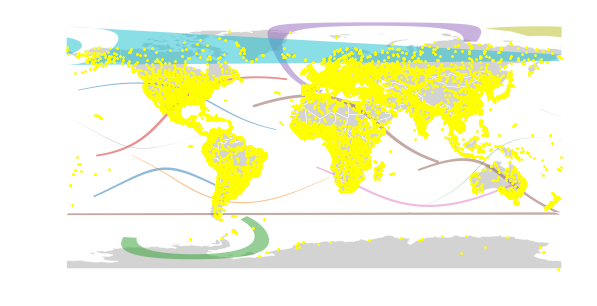

In [15]:
# Let's change our eclipse colors and transparency
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
eclipses.plot(ax=ax, cmap='tab10', alpha=0.5)
cities.plot(marker='*', color='yellow', markersize=5, ax=ax)
ax.axis('off')

In [16]:
# We just want to focus on a single eclipse path for our analysis. We will select one by year.
print(eclipses['Year'])

0     2017
1     2019
2     2020
3     2021
4     2023
5     2024
6     2026
7     2027
8     2028
9     2030
10    2031
11    2031
12    2033
13    2033
14    2033
Name: Year, dtype: int64


(-198.0, 198.00000000000014, -98.95351100000003, 98.0237310000001)

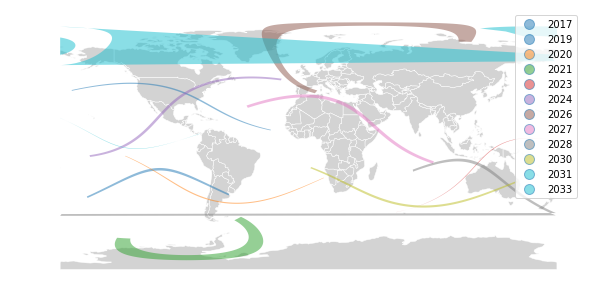

In [17]:
# But how do we know which is which?
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))

# We added categorical, column, and legend properties
eclipses.plot(ax=ax, cmap='tab10', categorical=True, alpha=0.5, column = "Year", legend=True)
ax.axis('off')

Your turn #1: Select the eclipse that you want to focus on.

In [18]:
# Your code here
myeclipse = eclipses[(eclipses['Year'] == 2024)]

In [19]:
# I'll pick the one from 2017, it was on my birthday afterall.
#myeclipse = eclipses[(eclipses['Year'] == 2017)]

(-198.36062037118467, 198.1539450753859, -99.34968948168924, 92.3591690229376)

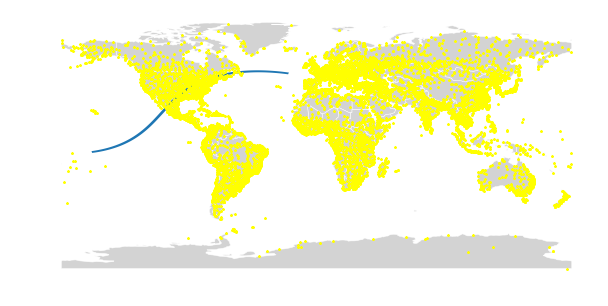

In [20]:
# Let's plot it 
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
myeclipse.plot(ax=ax)
cities.plot(marker='*', color='yellow', markersize=5, ax=ax)
ax.axis('off')

# this code block is repeated with different colors below

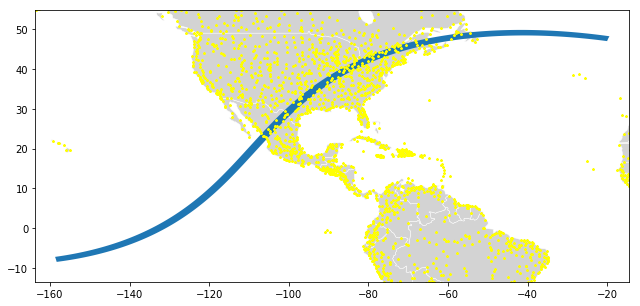

In [21]:
# But I want to zoom in on my chosen eclipse path
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
myeclipse.plot(ax=ax)
cities.plot(marker='*', color='yellow', markersize=5, ax=ax)
bounds = myeclipse.geometry.bounds

# To do this, you set the bounds to the min/max x/y of your layer
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5]);

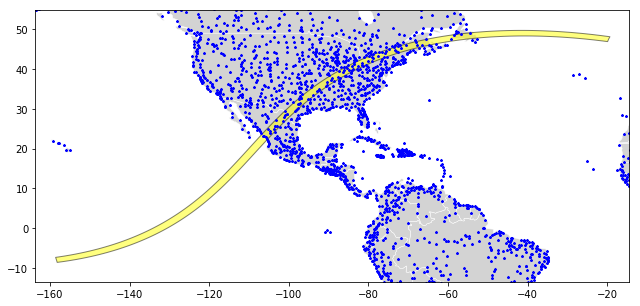

In [22]:
# But I want to zoom in on my chosen eclipse path
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
myeclipse.plot(ax=ax, color='yellow', edgecolor='black', alpha=0.5)
cities.plot(marker='*', color='blue', markersize=5, ax=ax)
bounds = myeclipse.geometry.bounds

# To do this, you set the bounds to the min/max x/y of your layer
plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5]);

In [23]:
# Check that the crs are the same for myeclipse and cities
myeclipse.crs == cities.crs

True

In [24]:
# We can see that there are a few cities that intersect my path! But we want to know which ones.
# Do a spatial join to get the intersection
from geopandas.tools import sjoin
ecities = gpd.sjoin(cities, myeclipse, how='inner', op='intersects')
ecities.head()

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,DIFFASCII,NAMEASCII,ADM0CAP,...,SymbolID,AltMode,Base,Clamped,Extruded,Snippet,PopupInfo,Shape_Leng,Shape_Area,Year
631,8,10,1,Populated place,Paragould,None,None,0,Paragould,0.0,...,0,0,0.0,-1,0,None,None,315.537741,253.727828,2024
665,8,10,1,Populated place,Cleburne,None,None,0,Cleburne,0.0,...,0,0,0.0,-1,0,None,None,315.537741,253.727828,2024
677,8,10,1,Populated place,Arlington,None,None,0,Arlington,0.0,...,0,0,0.0,-1,0,None,None,315.537741,253.727828,2024
691,8,10,1,Admin-1 capital,Montpelier,None,None,0,Montpelier,0.0,...,0,0,0.0,-1,0,None,None,315.537741,253.727828,2024
719,8,10,1,Populated place,Cape Girardeau,None,None,0,Cape Girardeau,0.0,...,0,0,0.0,-1,0,None,None,315.537741,253.727828,2024


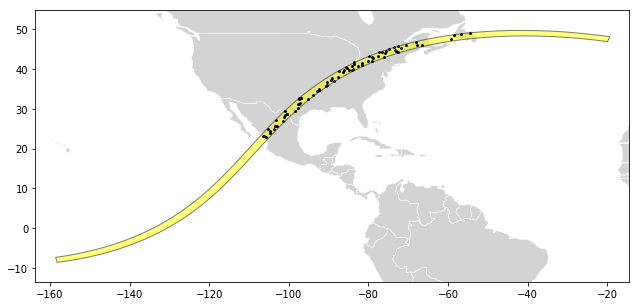

In [25]:
ax = world.plot(color='lightgrey', linewidth=0.5, edgecolor='white', figsize=(15,5))
myeclipse.plot(ax=ax, color='yellow', edgecolor='black', alpha=0.5)
ecities.plot(marker='*', color='black', markersize=5, ax=ax)
bounds = myeclipse.geometry.bounds

plt.xlim([bounds.minx.min()-5, bounds.maxx.max()+5])
plt.ylim([bounds.miny.min()-5, bounds.maxy.max()+5]);

In [26]:
ecities.head()

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,DIFFASCII,NAMEASCII,ADM0CAP,...,SymbolID,AltMode,Base,Clamped,Extruded,Snippet,PopupInfo,Shape_Leng,Shape_Area,Year
631,8,10,1,Populated place,Paragould,None,None,0,Paragould,0.0,...,0,0,0.0,-1,0,None,None,315.537741,253.727828,2024
665,8,10,1,Populated place,Cleburne,None,None,0,Cleburne,0.0,...,0,0,0.0,-1,0,None,None,315.537741,253.727828,2024
677,8,10,1,Populated place,Arlington,None,None,0,Arlington,0.0,...,0,0,0.0,-1,0,None,None,315.537741,253.727828,2024
691,8,10,1,Admin-1 capital,Montpelier,None,None,0,Montpelier,0.0,...,0,0,0.0,-1,0,None,None,315.537741,253.727828,2024
719,8,10,1,Populated place,Cape Girardeau,None,None,0,Cape Girardeau,0.0,...,0,0,0.0,-1,0,None,None,315.537741,253.727828,2024


In [27]:
# Check the crs if ecities
ecities.crs

{'init': 'epsg:4326'}

In [28]:
import folium

In [29]:
centx = myeclipse.centroid.x
centy = myeclipse.centroid.y

In [46]:
#not sure if this is a more or less confusing way to get the x and y values
myeclipse.centroid.x.values[0]

-93.295094820787

In [47]:
x = myeclipse.centroid.x.values[0]
y = myeclipse.centroid.y.values[0]

In [49]:
#for num in centx:
#    x = num

In [50]:
#for num in centy:
#    y = num

In [48]:
y,x

(26.719700290214362, -93.295094820787)

Let's choose a basemap! There are many options, [check them out](https://deparkes.co.uk/2016/06/10/folium-map-tiles/).

In [51]:
# Note: no matter what projection you were in before, the folium maps will be in Web Mercator
map_osm = folium.Map(location=[y, x], zoom_start=3)
map_osm

In [52]:
map_carto = folium.Map(
    location=[y, x],
    tiles='Cartodb Positron',
    zoom_start=3
)
map_carto

# this is a fun map style!!

In [53]:
map_stamen = folium.Map(
    location=[y, x],
    tiles='stamenwatercolor',
    zoom_start=3
)
map_stamen

In [54]:
folium.GeoJson(ecities,name='Eclipse Cities').add_to(map_stamen)
folium.GeoJson(myeclipse,name='Eclipse Path').add_to(map_stamen)

# Add a layer control if you like
#folium.LayerControl().add_to(map_stamen)

map_stamen

In [55]:
# Save your results as a Esri Shapefile
myeclipse.to_file('../Data/myeclipse.shp', driver='ESRI Shapefile')
ecities.to_file('../Data/ecities.shp', driver='ESRI Shapefile')